# T2.2 - CLUSTERIZAÇÃO

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

Utilizando o dataset1.csv em anexo e desconsiderando a variável target, façam diferentes clusterizações (variando as features, os algoritmos de clustering e suas configurações). Avaliem cada clusterização individualmente e, ao final, façam uma análise comparativa, discutam os resultados e escolham e justifiquem qual foi a melhor clusterização obtida.

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
dataset2 = pd.read_csv('dataset1.csv')

In [3]:
dataset2.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98,24.0
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14,21.6
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03,34.7
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94,33.4
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33,36.2
5,0.0,0,6.430,6.0622,222,394.12,0.02985,2.18,0.458,58.7,3,18.7,5.21,28.7
6,12.5,0,6.012,5.5605,311,395.60,0.08829,7.87,0.524,66.6,5,15.2,12.43,22.9
7,12.5,0,6.172,5.9505,311,396.90,0.14455,7.87,0.524,96.1,5,15.2,19.15,27.1
8,12.5,0,5.631,6.0821,311,386.63,0.21124,7.87,0.524,100.0,5,15.2,29.93,16.5
9,12.5,0,6.004,6.5921,311,386.71,0.17004,7.87,0.524,85.9,5,15.2,17.10,18.9


In [4]:
dataset2.dtypes

V1        float64
V2          int64
V3        float64
V4        float64
V5          int64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11         int64
V12       float64
V13       float64
target    float64
dtype: object

Com dtypes garantimos que todas as colunas sao float ou int.

# Deletando o target 

In [5]:
X = dataset2.drop(columns=['target'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33


In [6]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,0.069170,6.284634,3.795043,408.237154,356.674032,3.613524,11.136779,0.554695,68.574901,9.549407,18.455534,12.653063
std,23.322453,0.253994,0.702617,2.105710,168.537116,91.294864,8.601545,6.860353,0.115878,28.148861,8.707259,2.164946,7.141062
min,0.000000,0.000000,3.561000,1.129600,187.000000,0.320000,0.006320,0.460000,0.385000,2.900000,1.000000,12.600000,1.730000
25%,0.000000,0.000000,5.885500,2.100175,279.000000,375.377500,0.082045,5.190000,0.449000,45.025000,4.000000,17.400000,6.950000
50%,0.000000,0.000000,6.208500,3.207450,330.000000,391.440000,0.256510,9.690000,0.538000,77.500000,5.000000,19.050000,11.360000
75%,12.500000,0.000000,6.623500,5.188425,666.000000,396.225000,3.677082,18.100000,0.624000,94.075000,24.000000,20.200000,16.955000
max,100.000000,1.000000,8.780000,12.126500,711.000000,396.900000,88.976200,27.740000,0.871000,100.000000,24.000000,22.000000,37.970000


# Analizando a Correlação

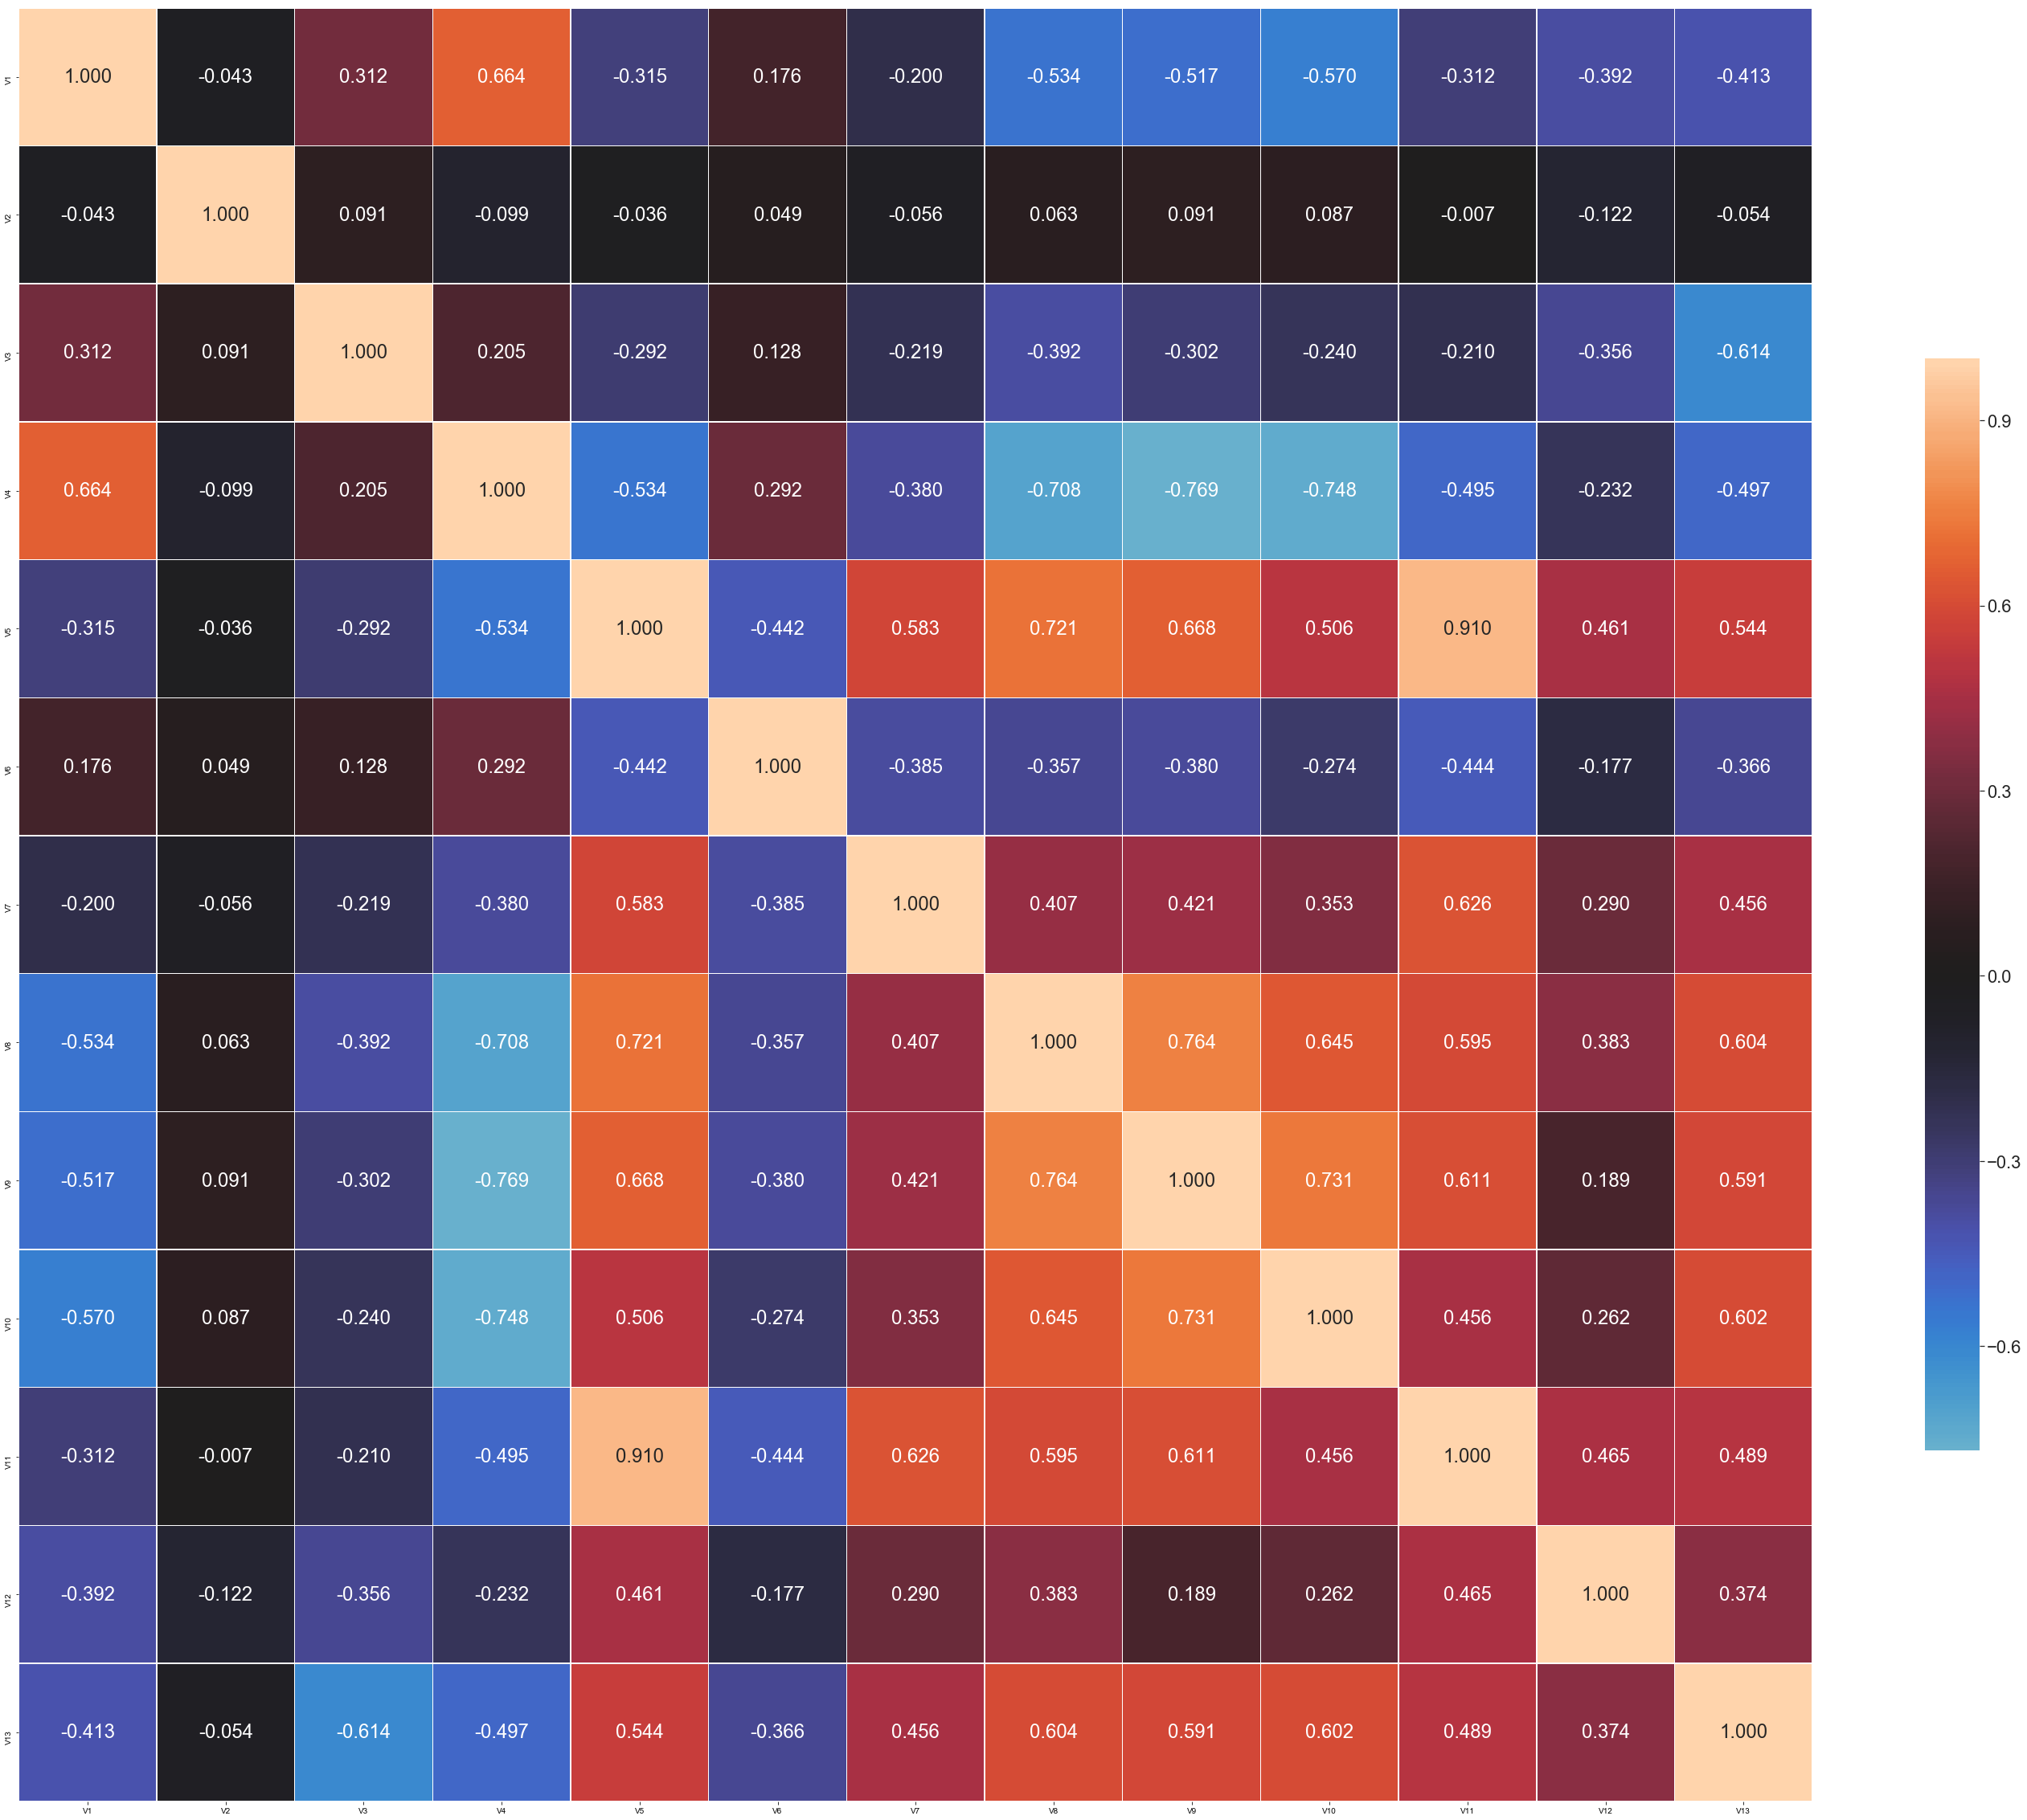

In [7]:
corr = X.corr()

f, ax = plt.subplots(figsize=(50,50))

sns.set(font_scale=2.0)

ax = sns.heatmap(corr, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
import warnings
warnings.filterwarnings('ignore')
#voltando o font scale ao normal
sns.reset_orig()


# K-MEANS

In [9]:
num_clusters = 2

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=num_clusters, random_state=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [11]:
y_pred = model.predict(X)

In [12]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33


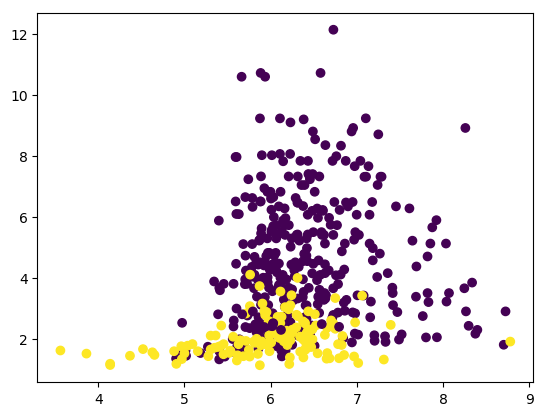

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X.V3, X.V4, c=y_pred)

plt.show()

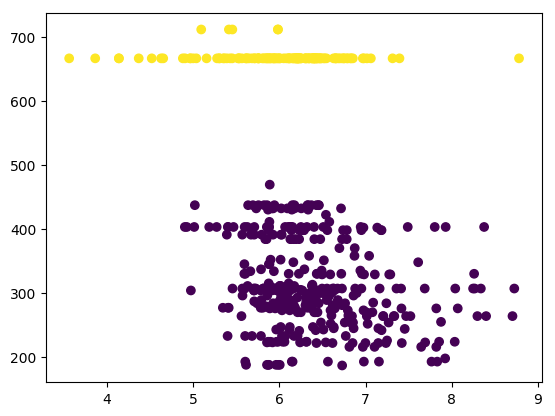

In [14]:
plt.scatter(X.V3, X.V5, c=y_pred)

plt.show()

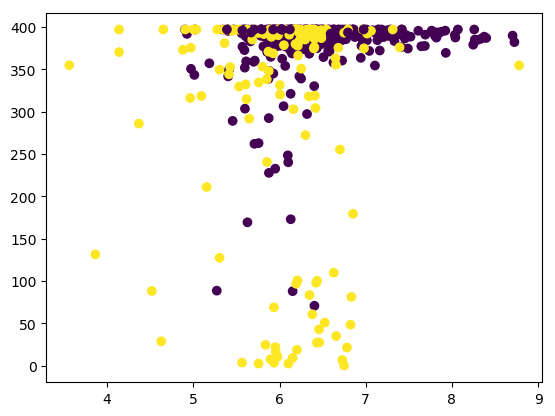

In [15]:
plt.scatter(X.V3, X.V6, c=y_pred)

plt.show()

In [16]:
silhouette_avg = silhouette_score(X, y_pred)
print("O silhouette médio é :", silhouette_avg)

O silhouette médio é : 0.6914045749383211


# K-MEDOIDS

In [17]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
num_clusters = 2

start_medoids_indexes = np.random.randint(0, X.shape[0], num_clusters)

# Alguns valores em type_metric: EUCLIDEAN, EUCLIDEAN_SQUARE, MANHATTAN, MINKOWSKI, CHEBYSHEV
metric = distance_metric(type_metric.MANHATTAN)

In [18]:
model = kmedoids(X.values, start_medoids_indexes, metric=metric)
model.process()

In [19]:
clusters_indexes = model.get_clusters()

In [20]:
y_pred = np.zeros(len(X))

for cluster_idx, item_idx in enumerate(clusters_indexes):
    y_pred[item_idx] = cluster_idx

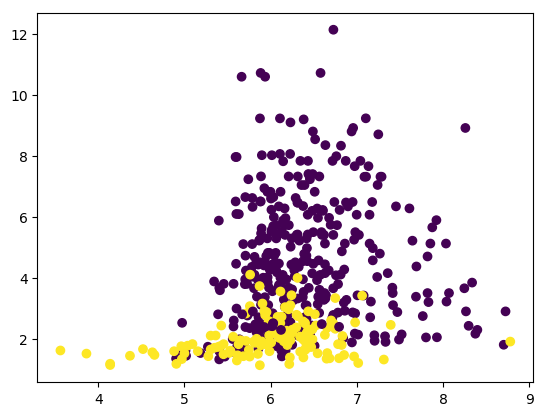

In [21]:
plt.scatter(X.V3, X.V4, c=y_pred)

plt.show()

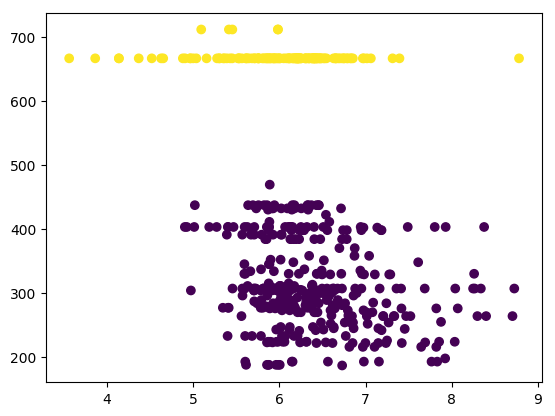

In [22]:
plt.scatter(X.V3, X.V5, c=y_pred)

plt.show()

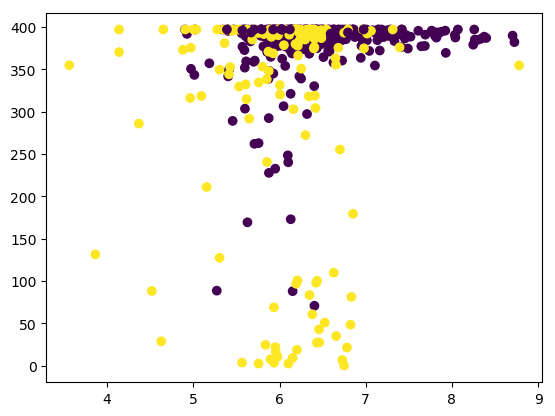

In [23]:
plt.scatter(X.V3, X.V6, c=y_pred)

plt.show()